### 데이터 전처리 실습
 - 가상의 당뇨병 환자 데이터 생성 및 처리



##### 환경 구성

In [4]:
import pandas as pd
import numpy as np 
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [5]:
np.random.seed(3)

data = {
    'age' : np.random.randint(20,80,100),
    'gender' : np.random.choice(['M', 'F'], 100),
    'bmi' : np.random.uniform(18.5, 35, 100),
    'blood_pressure' : np.random.randint(80, 180, 100),
    'glucose_level' : np.random.uniform(70, 200, 100),
    'insulin' : np.random.uniform(15, 300, 100),
    'diabetes' : np.random.choice([0,1], 100, p=[0.7, 0.3])
}

In [6]:
df = pd.DataFrame(data)
df

,age,gender,bmi,blood_pressure,glucose_level,insulin,diabetes
0,62,M,26.244792,106,190.578806,113.311737,0
1,44,M,26.791749,158,98.643723,127.504283,1
2,77,M,21.343988,102,102.750939,21.336088,0
3,23,M,23.423713,156,187.521621,203.198910,0
4,76,M,22.935321,91,114.917254,63.447155,0
...,...,...,...,...,...,...,...
95,72,M,23.180876,91,189.661025,238.511383,0
96,69,F,22.012757,104,125.139142,244.173089,0
97,70,M,25.434397,170,150.512546,39.657672,0
98,22,M,20.576047,168,96.403995,139.085175,0


##### 결측치 생성

In [7]:
df.loc[np.random.choice(df.index, 10), 'bmi'] = np.nan
df.loc[np.random.choice(df.index, 10), 'insulin'] = np.nan

In [8]:
df.tail(15) #결측치 생성

,age,gender,bmi,blood_pressure,glucose_level,insulin,diabetes
85,38,M,25.915120,103,164.401839,45.737563,0
86,31,F,26.369374,176,140.717134,238.638316,1
87,75,F,27.018715,164,139.540293,157.159487,0
88,52,F,24.579924,98,130.389807,34.983919,0
89,51,M,22.830051,154,70.870248,249.567886,0
90,33,F,31.746662,169,121.021349,126.636631,0
91,57,F,33.362718,124,199.861997,45.428007,0
92,50,M,24.457882,111,176.637857,64.532557,0
93,68,F,33.087067,171,144.471892,259.938296,1
94,53,M,23.551100,156,95.540185,64.231413,1


In [9]:
#결측치 개수 확인
df.isnull().sum()

age                0
gender             0
bmi                8
blood_pressure     0
glucose_level      0
insulin           10
diabetes           0
dtype: int64

##### Numeric, Catehorical data

In [10]:
df.describe() #colum들에 대해 대표값?들을 알 수 있음

,age,bmi,blood_pressure,glucose_level,insulin,diabetes
count,100.000000,92.000000,100.000000,100.000000,90.000000,100.000000
mean,51.430000,26.884778,129.190000,136.018460,165.077223,0.310000
std,17.624166,4.710787,30.636248,37.279935,79.962184,0.464823
min,20.000000,18.864581,80.000000,70.276323,18.728601,0.000000
25%,37.750000,22.931775,102.750000,102.694345,112.568564,0.000000
50%,52.000000,26.317681,128.000000,139.706647,162.340935,0.000000
75%,68.000000,31.410877,156.500000,165.770543,226.980967,1.000000
max,79.000000,34.999595,179.000000,199.861997,298.309161,1.000000


In [11]:
numeric_feature = ['age', 'bmi', 'blood_pressure', 'glucose_level', 'insulin']
categorical_feature = ['gender']

##### Pipeline 구성

In [41]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())    
])
#simpleimputer가 결측치에 median 값으로 땜빵하고, 스캐일러로 표준화 진행

In [13]:
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(drop='first'))
])

In [14]:
preprocessor = ColumnTransformer (
    transformers=[
        ('num', numeric_transformer, numeric_feature),
        ('cat', categorical_transformer, categorical_feature)
    ]
)

##### Pipeline 실행

In [15]:
X = df.drop('diabetes', axis=1)
y = df['diabetes']
X_processed = preprocessor.fit_transform(X)

In [16]:
feature_names = (numeric_feature + preprocessor.named_transformers_['cat']
                .named_steps['onehot']
                .get_feature_names_out(categorical_feature).tolist())

X_processed_df = pd.DataFrame(X_processed, columns=feature_names, index=X.index)

##### 상관관계 분석

In [17]:
correlation = X_processed_df.corr()
correlation

,age,bmi,blood_pressure,glucose_level,insulin,gender_M
age,1.000000,-0.077216,-0.000433,0.031987,0.018829,-0.033992
bmi,-0.077216,1.000000,0.020765,-0.016169,0.113527,-0.212271
blood_pressure,-0.000433,0.020765,1.000000,-0.108520,0.098721,-0.101271
glucose_level,0.031987,-0.016169,-0.108520,1.000000,0.002093,0.050307
insulin,0.018829,0.113527,0.098721,0.002093,1.000000,0.034133
gender_M,-0.033992,-0.212271,-0.101271,0.050307,0.034133,1.000000


##### 주요 특성(important feature)

In [18]:
threshold = 0.5
important_feature = correlation[abs(correlation['glucose_level']) > threshold].index

important_feature.tolist()

['glucose_level']

### 데이터 전처리 실습 2

In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA

##### UCI M Repository
- 심장질환 데이터셋을 링크로 불러오기

In [20]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"

In [21]:
column_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang',
                'oldpeak', 'slope', 'ca', 'thal', 'num']

In [22]:
df = pd.read_csv(url, names=column_names, na_values='?')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


In [23]:
%pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [24]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64

<Axes: >

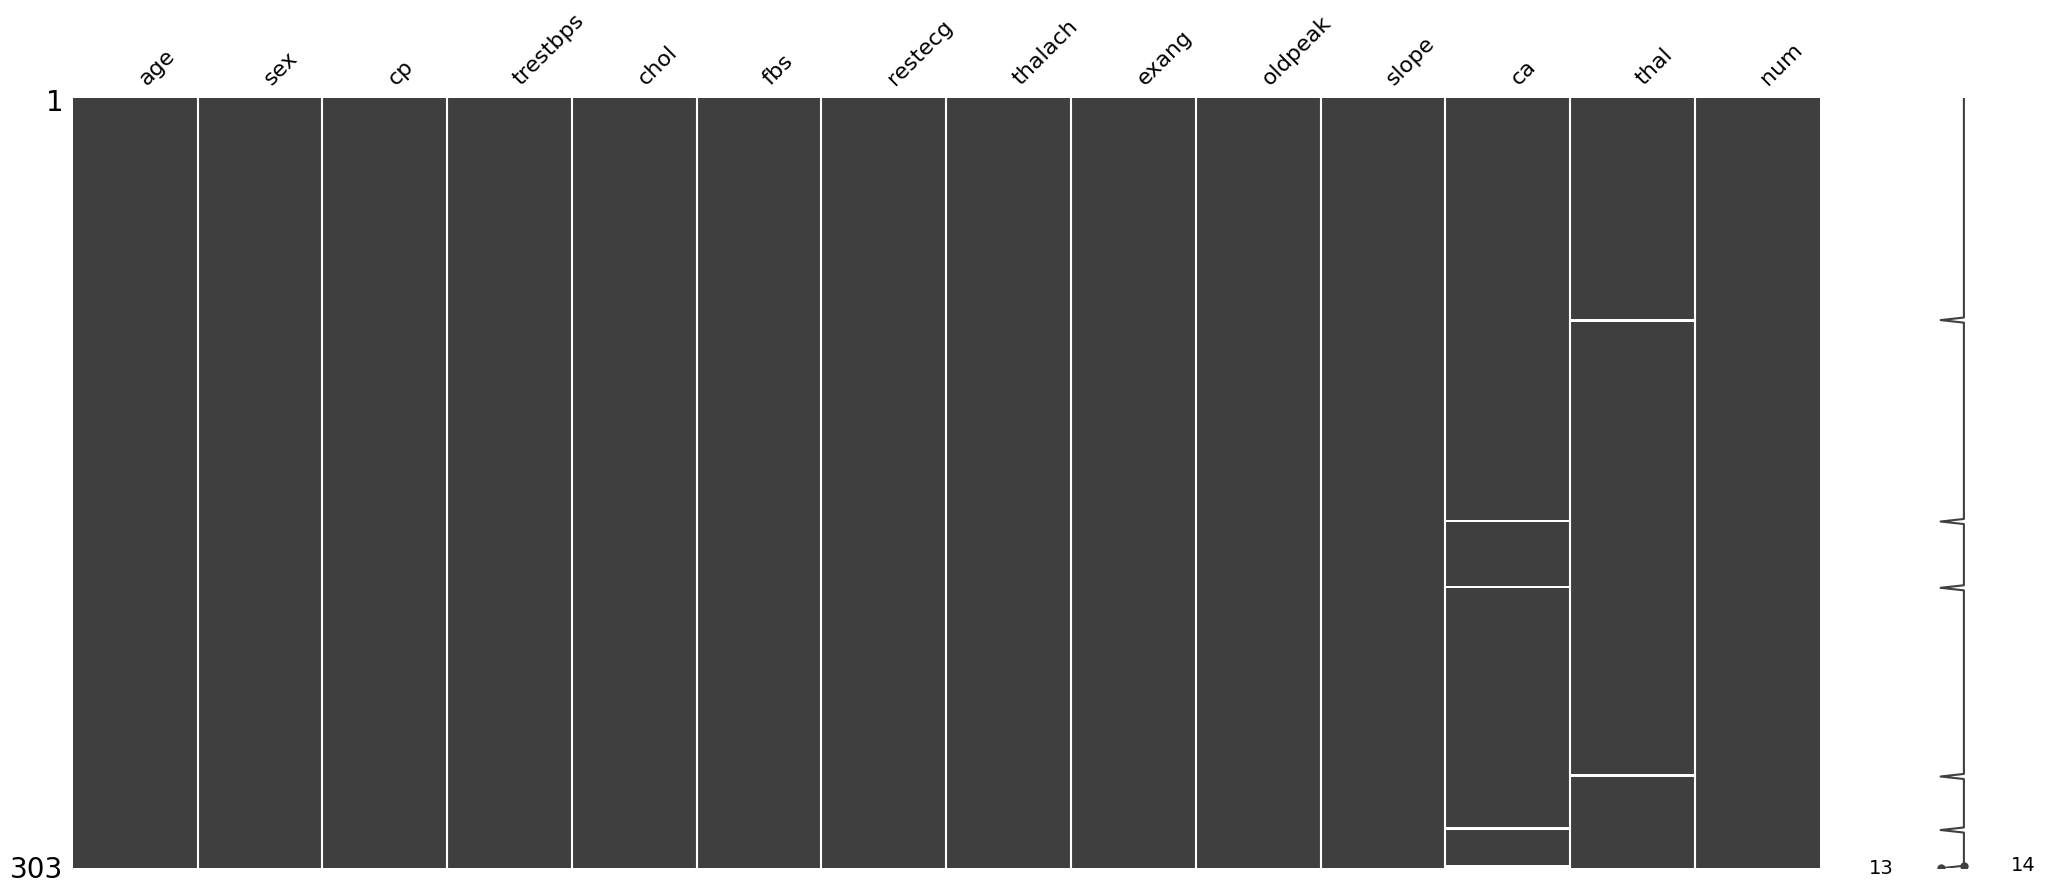

In [25]:
import missingno as msno

msno.matrix(df) #결측치 시각적으로 확인 가능

##### 이상치 처리
* RobustScaler
-  이상치에 덜 민감한 스케일링 방식. 중앙값과 사분위값을 이용한 스케일링 방식
-  StandardScaler와 다르게 극단적 값에 영향이 적다.
-  데이터에 이상치가 많거나 정규분포를 따르지 않을 때 사용

$$
    X\_scaled = (X-median)/IQR
$$

In [26]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


In [27]:
df.info() #pandas에서 info를 확인하는 방법

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 33.3 KB


In [28]:
numeric_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
robust_scaler = RobustScaler()
df[numeric_features] = robust_scaler.fit_transform(df[numeric_features]) #스케일링 처리해서 다시 넣어라

In [29]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000,303.000000
mean,-0.120081,0.679868,3.158416,0.084488,0.088954,0.148515,0.990099,-0.104392,0.326733,0.149752,1.600660,0.672241,4.734219,0.937294
std,0.695282,0.467299,0.960126,0.879987,0.809014,0.356198,0.994971,0.703846,0.469794,0.725672,0.616226,0.937438,1.939706,1.228536
min,-2.076923,0.000000,1.000000,-1.800000,-1.796875,0.000000,0.000000,-2.523077,0.000000,-0.500000,1.000000,0.000000,3.000000,0.000000
25%,-0.615385,0.000000,3.000000,-0.500000,-0.468750,0.000000,0.000000,-0.600000,0.000000,-0.500000,1.000000,0.000000,3.000000,0.000000
50%,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000,0.000000,3.000000,0.000000
75%,0.384615,1.000000,4.000000,0.500000,0.531250,0.000000,2.000000,0.400000,1.000000,0.500000,2.000000,1.000000,7.000000,2.000000
max,1.615385,1.000000,4.000000,3.500000,5.046875,1.000000,2.000000,1.507692,1.000000,3.375000,3.000000,3.000000,7.000000,4.000000


스탠다드 스케일러는 비교를 위해서. 로버스터는 이상치를 위해서.

#### 결측치 처리
- SimpleImputer
- KNNImputer
    KNN알고리즘을 활용해 결측치 주변이 데이터를 사용하여 결측치를 대체 
    변수간의 관계가 복잡하거나 SimpleImputer로 부족한 경우


In [30]:
imputer = KNNImputer(n_neighbors=5)
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns = df.columns)

df_imputed

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,0.538462,1.0,1.0,0.75,-0.125000,1.0,2.0,-0.092308,0.0,0.9375,3.0,0.0,6.0,0.0
1,0.846154,1.0,4.0,1.50,0.703125,0.0,2.0,-1.384615,1.0,0.4375,2.0,3.0,3.0,2.0
2,0.846154,1.0,4.0,-0.50,-0.187500,0.0,2.0,-0.738462,1.0,1.1250,2.0,2.0,7.0,1.0
3,-1.461538,1.0,3.0,0.00,0.140625,0.0,0.0,1.046154,0.0,1.6875,3.0,0.0,3.0,0.0
4,-1.153846,0.0,2.0,0.00,-0.578125,0.0,2.0,0.584615,0.0,0.3750,1.0,0.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,-0.846154,1.0,1.0,-1.00,0.359375,0.0,0.0,-0.646154,0.0,0.2500,2.0,0.0,7.0,1.0
299,0.923077,1.0,4.0,0.70,-0.750000,1.0,0.0,-0.369231,0.0,1.6250,2.0,2.0,7.0,2.0
300,0.076923,1.0,4.0,0.00,-1.718750,0.0,0.0,-1.169231,1.0,0.2500,2.0,1.0,7.0,3.0
301,0.076923,0.0,2.0,0.00,-0.078125,0.0,2.0,0.646154,0.0,-0.5000,2.0,1.0,3.0,1.0


<Axes: >

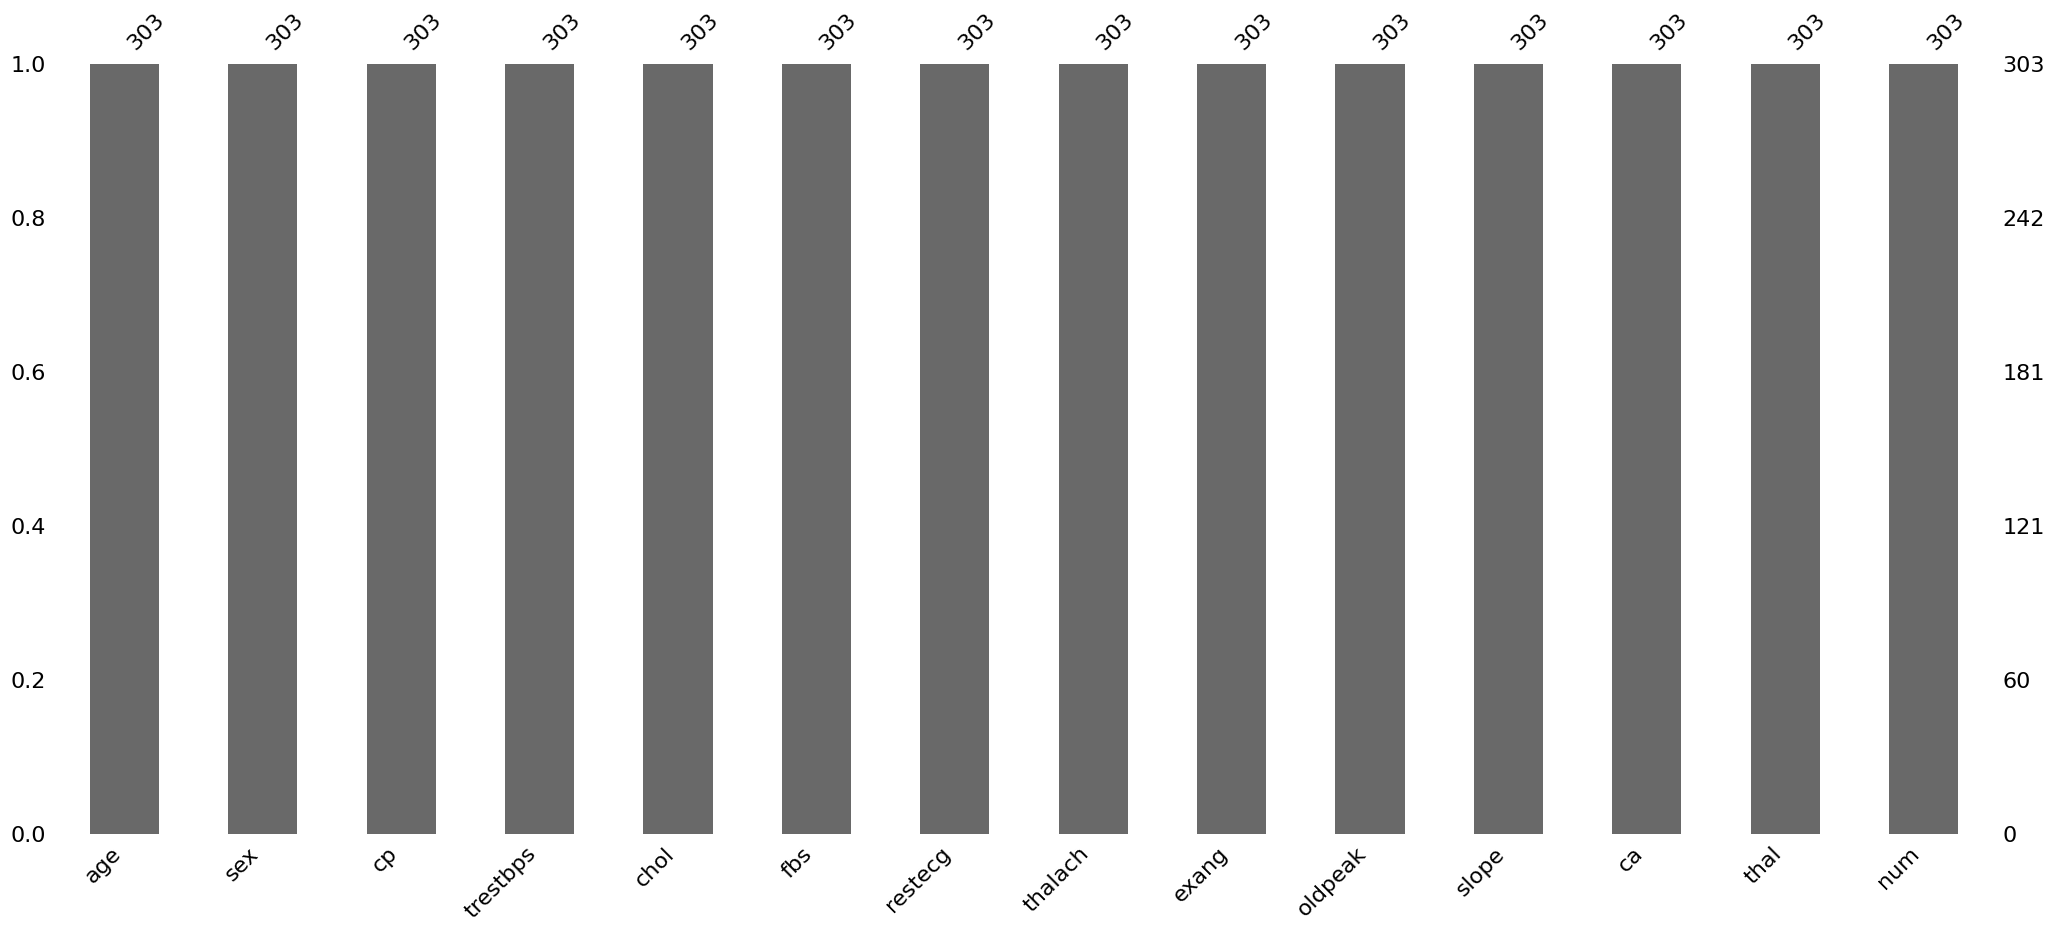

In [31]:
msno.bar(df_imputed)

#### 범주형 데이터 처리
* One-hot Encoding
* Label Encoding

In [32]:
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']
label_encoder = LabelEncoder()

for f in categorical_features:
    df_imputed[f] = label_encoder.fit_transform(df_imputed[f].astype(str))
    
df_imputed

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,0.538462,1,0,0.75,-0.125000,1,2,-0.092308,0,0.9375,2,0.0,2,0.0
1,0.846154,1,3,1.50,0.703125,0,2,-1.384615,1,0.4375,1,3.0,0,2.0
2,0.846154,1,3,-0.50,-0.187500,0,2,-0.738462,1,1.1250,1,2.0,3,1.0
3,-1.461538,1,2,0.00,0.140625,0,0,1.046154,0,1.6875,2,0.0,0,0.0
4,-1.153846,0,1,0.00,-0.578125,0,2,0.584615,0,0.3750,0,0.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,-0.846154,1,0,-1.00,0.359375,0,0,-0.646154,0,0.2500,1,0.0,3,1.0
299,0.923077,1,3,0.70,-0.750000,1,0,-0.369231,0,1.6250,1,2.0,3,2.0
300,0.076923,1,3,0.00,-1.718750,0,0,-1.169231,1,0.2500,1,1.0,3,3.0
301,0.076923,0,1,0.00,-0.078125,0,2,0.646154,0,-0.5000,1,1.0,0,1.0


In [33]:
df_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    float64
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    float64
 12  thal      303 non-null    int64  
 13  num       303 non-null    float64
dtypes: float64(7), int64(7)
memory usage: 33.3 KB


#### 새로운 특성 생성

In [34]:
df_imputed['bmi'] = df_imputed['trestbps'] / ((df_imputed['age']/100)** 2)
df_imputed['heart_rate_pressure_product'] = df_imputed['thalach'] * df_imputed['trestbps']

df_imputed

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,bmi,heart_rate_pressure_product
0,0.538462,1,0,0.75,-0.125000,1,2,-0.092308,0,0.9375,2,0.0,2,0.0,25867.346939,-0.069231
1,0.846154,1,3,1.50,0.703125,0,2,-1.384615,1,0.4375,1,3.0,0,2.0,20950.413223,-2.076923
2,0.846154,1,3,-0.50,-0.187500,0,2,-0.738462,1,1.1250,1,2.0,3,1.0,-6983.471074,0.369231
3,-1.461538,1,2,0.00,0.140625,0,0,1.046154,0,1.6875,2,0.0,0,0.0,0.000000,0.000000
4,-1.153846,0,1,0.00,-0.578125,0,2,0.584615,0,0.3750,0,0.0,0,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,-0.846154,1,0,-1.00,0.359375,0,0,-0.646154,0,0.2500,1,0.0,3,1.0,-13966.942149,0.646154
299,0.923077,1,3,0.70,-0.750000,1,0,-0.369231,0,1.6250,1,2.0,3,2.0,8215.277778,-0.258462
300,0.076923,1,3,0.00,-1.718750,0,0,-1.169231,1,0.2500,1,1.0,3,3.0,0.000000,-0.000000
301,0.076923,0,1,0.00,-0.078125,0,2,0.646154,0,-0.5000,1,1.0,0,1.0,0.000000,0.000000


In [35]:
df_imputed = df_imputed.drop(['bmi', 'heart_rate_pressure_product'], axis=1)
df_imputed

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,0.538462,1,0,0.75,-0.125000,1,2,-0.092308,0,0.9375,2,0.0,2,0.0
1,0.846154,1,3,1.50,0.703125,0,2,-1.384615,1,0.4375,1,3.0,0,2.0
2,0.846154,1,3,-0.50,-0.187500,0,2,-0.738462,1,1.1250,1,2.0,3,1.0
3,-1.461538,1,2,0.00,0.140625,0,0,1.046154,0,1.6875,2,0.0,0,0.0
4,-1.153846,0,1,0.00,-0.578125,0,2,0.584615,0,0.3750,0,0.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,-0.846154,1,0,-1.00,0.359375,0,0,-0.646154,0,0.2500,1,0.0,3,1.0
299,0.923077,1,3,0.70,-0.750000,1,0,-0.369231,0,1.6250,1,2.0,3,2.0
300,0.076923,1,3,0.00,-1.718750,0,0,-1.169231,1,0.2500,1,1.0,3,3.0
301,0.076923,0,1,0.00,-0.078125,0,2,0.646154,0,-0.5000,1,1.0,0,1.0


#### 낮은 분산 특성 제거
 - 분산 낮다 = 분포도가 낮다 = 데이터가 별 의미 없음.. 다 비슷한 애들이라는 말
 - 변화가 없는 특성 제거
 - 복잡성을 낮춤
 - 다중공선성 낮추는 방안 : 각 요소끼리 묶여서 지지고 볶고 하는 애들 중 하나를 제거. 유의미한 결과가 있는 것처럼 사기치는 현상 예방 (필연적인걸 가지고 자꾸 우기니까 분석하는데 방해됨)


In [36]:
selector = VarianceThreshold(threshold=0.1)
selected_features = selector.fit_transform(df_imputed)
#분산값 0.1 못넘기면 빼라 뺴
selected_features_names = df_imputed.columns[selector.get_support()].tolist()

df_selected = pd.DataFrame(selected_features, columns=selected_features_names)

df_selected

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,0.538462,1.0,0.0,0.75,-0.125000,1.0,2.0,-0.092308,0.0,0.9375,2.0,0.0,2.0,0.0
1,0.846154,1.0,3.0,1.50,0.703125,0.0,2.0,-1.384615,1.0,0.4375,1.0,3.0,0.0,2.0
2,0.846154,1.0,3.0,-0.50,-0.187500,0.0,2.0,-0.738462,1.0,1.1250,1.0,2.0,3.0,1.0
3,-1.461538,1.0,2.0,0.00,0.140625,0.0,0.0,1.046154,0.0,1.6875,2.0,0.0,0.0,0.0
4,-1.153846,0.0,1.0,0.00,-0.578125,0.0,2.0,0.584615,0.0,0.3750,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,-0.846154,1.0,0.0,-1.00,0.359375,0.0,0.0,-0.646154,0.0,0.2500,1.0,0.0,3.0,1.0
299,0.923077,1.0,3.0,0.70,-0.750000,1.0,0.0,-0.369231,0.0,1.6250,1.0,2.0,3.0,2.0
300,0.076923,1.0,3.0,0.00,-1.718750,0.0,0.0,-1.169231,1.0,0.2500,1.0,1.0,3.0,3.0
301,0.076923,0.0,1.0,0.00,-0.078125,0.0,2.0,0.646154,0.0,-0.5000,1.0,1.0,0.0,1.0


#### 6. 차원 축소 (PCA)

In [37]:
# PCA
pca = PCA(n_components=0.95) #몇퍼센트의 분산을 가지는 차원 축소를 할 것이냐?
pca_features = pca.fit_transform(df_selected)

In [38]:
# PCA 이전의 특성 이름 저장
x = df_selected.drop('num', axis=1)
y = df_selected['num']

In [39]:
pca_features.shape[1]

11

In [ ]:

# 4. 새로운 특성 생성 
df_imputed['heart_rate_pressure_product'] = df_imputed['thalach'] * df_imputed['trestbps']
df_imputed['age_pressure_index'] = np.where(df_imputed['age'] != 0, df_imputed['trestbps'] / df_imputed['age'], 0)
df_imputed = df_imputed.replace([np.inf, -np.inf], np.nan).fillna(0) # 무한대 값을 NaN으로 변경하고, NaN을 0으로 대체

# 5. 낮은 분산 특성 제거
selector = VarianceThreshold(threshold=0.1)
selected_features = selector.fit_transform(df_imputed)
selected_feature_names = df_imputed.columns[selector.get_support()].tolist()
df_selected = pd.DataFrame(selected_features, columns=selected_feature_names)

# 6. 차원 축소 (PCA)
pca = PCA(n_components=0.95)  # 95% 분산 유지
pca_features = pca.fit_transform(df_selected)

# PCA 이전의 특성 이름 저장
original_feature_names = df_selected.columns.tolist()

# 7. 데이터 분할
X = pd.DataFrame(pca_features, columns=[f'PC{i+1}' for i in range(pca_features.shape[1])])
y = df_selected['num']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X.head())
print("\nPCA 후 특성 수:", pca_features.shape[1])

# PCA 결과 분석
print("\nPCA 설명된 분산 비율:", pca.explained_variance_ratio_)
print("\nPCA 누적 설명 분산 비율:", np.cumsum(pca.explained_variance_ratio_))

# 특성 중요도
feature_importance = np.sum(np.abs(pca.components_), axis=0)
feature_importance_df = pd.DataFrame({
    'feature': original_feature_names[:len(feature_importance)], 
    'importance': feature_importance
})
feature_importance_df = feature_importance_df.sort_values('importance', ascending=False)
print("\n특성 중요도 (상위 5개):")
print(feature_importance_df.head())

# 시각화
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.matshow(pca.components_, cmap='viridis', aspect='auto')
plt.yticks(range(pca_features.shape[1]), [f'PC{i+1}' for i in range(pca_features.shape[1])])
plt.colorbar()
plt.xticks(range(len(original_feature_names[:len(feature_importance)])), 
           original_feature_names[:len(feature_importance)], rotation=90, ha='left')
plt.tight_layout()
plt.title("PCA Components Heatmap")
plt.show()